In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

### Load the SVHN dataset

In [2]:
svhn_train = loadmat('train_32x32.mat')
svhn_test = loadmat('test_32x32.mat')

### Extract images and labels

In [3]:
X_train = svhn_train['X']
y_train = svhn_train['y']
X_test = svhn_test['X']
y_test = svhn_test['y']


### Check the data shape

In [4]:
print("Train images shape:", X_train.shape)  # (32, 32, 3, num_samples)
print("Train labels shape:", y_train.shape)
print("Test images shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Train images shape: (32, 32, 3, 73257)
Train labels shape: (73257, 1)
Test images shape: (32, 32, 3, 26032)
Test labels shape: (26032, 1)


### Reshape the data to match TensorFlow's expected input

In [5]:
X_train = np.moveaxis(X_train, -1, 0)
X_test = np.moveaxis(X_test, -1, 0)
print("Reshaped train images:", X_train.shape)  # Now (num_samples, 32, 32, 3)

Reshaped train images: (73257, 32, 32, 3)


### Normalize the data

In [6]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

### Correct labels: In the dataset, the label '10' represents '0', fix it

In [7]:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

### One-hot encode the labels

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Split the train set into training and validation sets

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


### Define the CNN model

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the model

In [12]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

Epoch 1/10
916/916 ━━━━━━━━━━━━━━━━━━━━ 35s 32ms/step - accuracy: 0.3886 - loss: 1.7520 - val_accuracy: 0.8208 - val_loss: 0.5864
Epoch 2/10
916/916 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.8054 - loss: 0.6554 - val_accuracy: 0.8602 - val_loss: 0.4653
Epoch 3/10
916/916 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.8464 - loss: 0.5160 - val_accuracy: 0.8724 - val_loss: 0.4194
Epoch 4/10
916/916 ━━━━━━━━━━━━━━━━━━━━ 29s 32ms/step - accuracy: 0.8695 - loss: 0.4473 - val_accuracy: 0.8845 - val_loss: 0.3829
Epoch 5/10
916/916 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.8818 - loss: 0.4039 - val_accuracy: 0.8923 - val_loss: 0.3640
Epoch 6/10
916/916 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.8918 - loss: 0.3684 - val_accuracy: 0.8994 - val_loss: 0.3476
Epoch 7/10
916/916 ━━━━━━━━━━━━━━━━━━━━ 29s 32ms/step - accuracy: 0.8952 - loss: 0.3615 - val_accuracy: 0.8894 - val_loss: 0.3699
Epoch 8/10
916/916 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - accuracy: 0.9010 - loss: 0.3370 - 

### Evaluate the model

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

814/814 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9036 - loss: 0.3582
Test accuracy: 0.9042


### Generate predictions

In [14]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

814/814 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


### Confusion Matrix

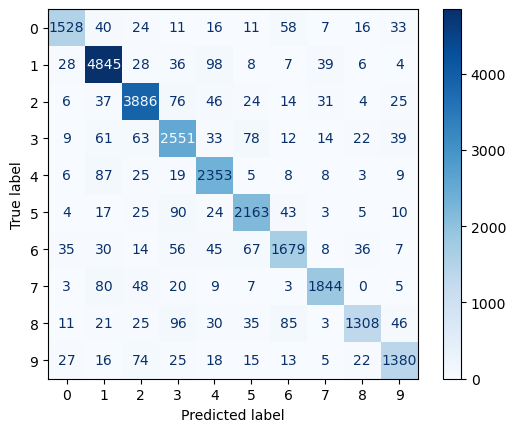

In [15]:
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

### Visualize test samples with predicted and true labels

In [16]:
# Choose indices for samples to display
indices = range(10)  # You can choose any indices of interest

### Plot the selected test samples

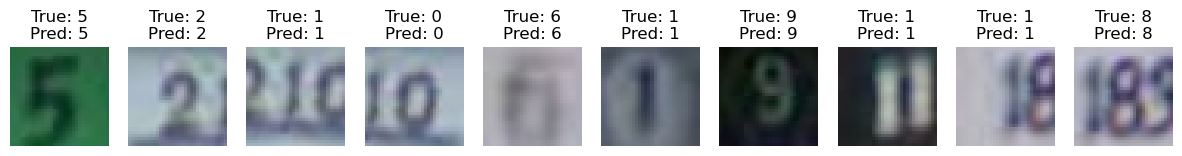

In [17]:
plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    plt.subplot(1, len(indices), i +1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {y_true[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')

plt.show()
